In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [4]:
try:
    df = pd.read_csv('../data/heart_disease_cleaned.csv')
    print("Cleaned dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'heart_disease_cleaned.csv' not found.")
    print("Please run the data preprocessing script first to generate this file.")
    
    print("Creating a dummy dataframe for demonstration purposes.")
    data = {
        'age': np.random.rand(303), 'sex': np.random.rand(303), 'cp': np.random.rand(303),
        'trestbps': np.random.rand(303), 'chol': np.random.rand(303), 'fbs': np.random.rand(303),
        'restecg': np.random.rand(303), 'thalach': np.random.rand(303), 'exang': np.random.rand(303),
        'oldpeak': np.random.rand(303), 'slope': np.random.rand(303), 'ca': np.random.rand(303),
        'thal': np.random.rand(303), 'target': np.random.randint(0, 2, 303)
    }
    df = pd.DataFrame(data)

Cleaned dataset loaded successfully.


In [5]:
X = df.drop('target', axis=1)
y = df['target']

print("\n--- Shape of the feature matrix before PCA ---")
print(X.shape)


--- Shape of the feature matrix before PCA ---
(303, 13)


In [6]:
pca = PCA()
X_pca_full = pca.fit_transform(X)

In [7]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

print("\n--- Explained Variance by Each Principal Component ---")
print(explained_variance_ratio)


--- Explained Variance by Each Principal Component ---
[0.35689526 0.1444626  0.09533198 0.07791497 0.07119523 0.06125927
 0.05614548 0.05264896 0.03334504 0.01636958 0.01377101 0.01149924
 0.00916138]


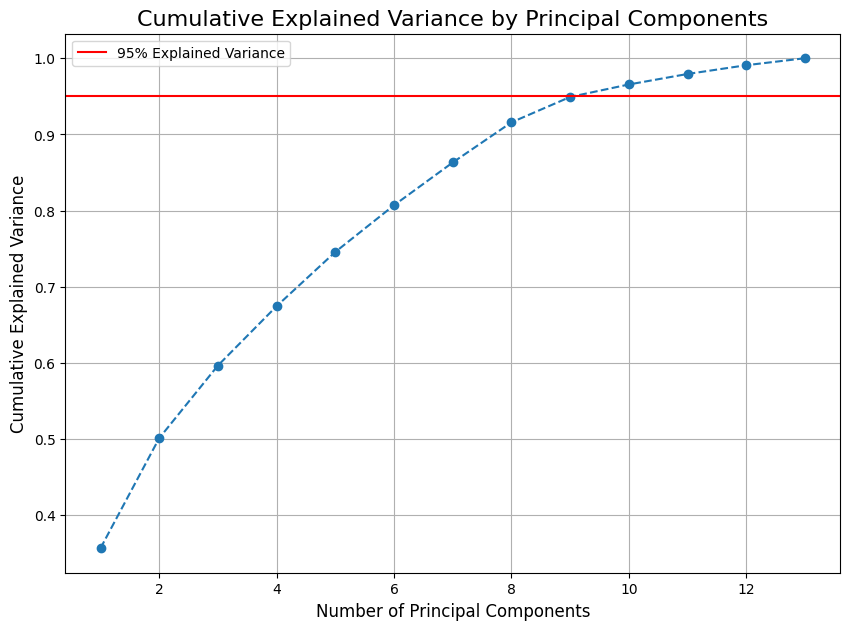

In [8]:
plt.figure(figsize=(10, 7))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Principal Components', fontsize=16)
plt.xlabel('Number of Principal Components', fontsize=12)
plt.ylabel('Cumulative Explained Variance', fontsize=12)
plt.axhline(y=0.95, color='r', linestyle='-', label='95% Explained Variance')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [9]:
n_components_95 = np.where(cumulative_explained_variance >= 0.95)[0][0] + 1
print(f"\nNumber of components to explain at least 95% of variance: {n_components_95}")


Number of components to explain at least 95% of variance: 10


In [10]:
pca = PCA(n_components=n_components_95)
X_pca = pca.fit_transform(X)

In [11]:
print(f"\n--- Shape of the feature matrix after PCA (retaining {n_components_95} components) ---")
print(X_pca.shape)


--- Shape of the feature matrix after PCA (retaining 10 components) ---
(303, 10)


C:\Users\ahmed\AppData\Local\Temp\ipykernel_8960\3599348125.py:6: UserWarning: Mismatched number of handles and labels: len(handles) = 5 len(labels) = 2
  plt.legend(handles=scatter.legend_elements()[0], labels=['No Disease', 'Disease'])


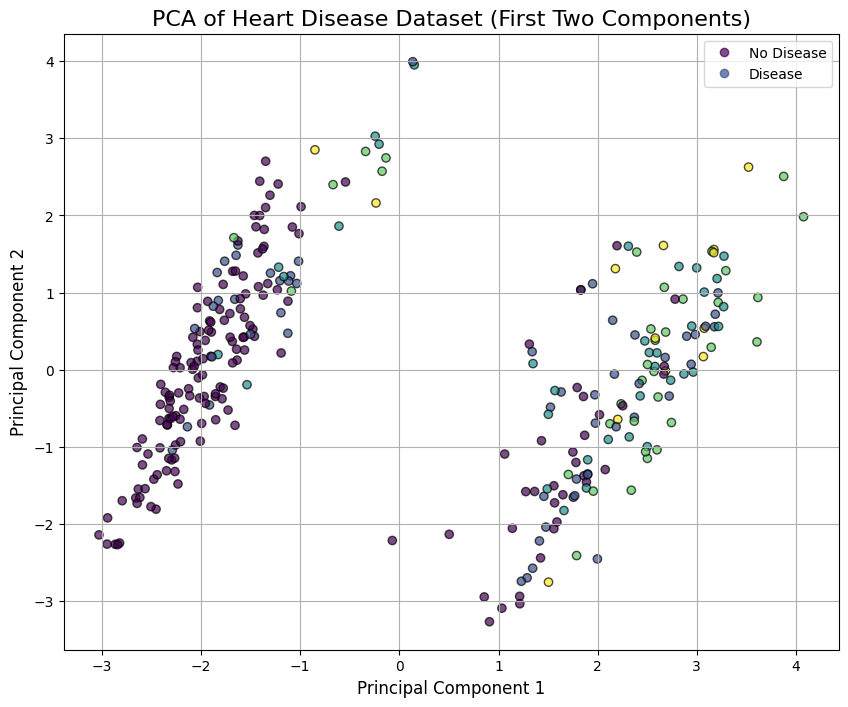

In [12]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7, edgecolors='k')
plt.title('PCA of Heart Disease Dataset (First Two Components)', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(handles=scatter.legend_elements()[0], labels=['No Disease', 'Disease'])
plt.grid(True)
plt.show()

In [13]:
pca_columns = [f'PC_{i+1}' for i in range(n_components_95)]
pca_df = pd.DataFrame(data=X_pca, columns=pca_columns)
final_df = pd.concat([pca_df, y], axis=1)

In [14]:
final_df.to_csv('../data/heart_disease_pca.csv', index=False)
print(f"\nPCA-transformed data with {n_components_95} components saved to 'heart_disease_pca.csv'")



PCA-transformed data with 10 components saved to 'heart_disease_pca.csv'


In [15]:
print(final_df.head())

       PC_1      PC_2      PC_3      PC_4      PC_5      PC_6      PC_7  \
0  1.311058  0.332804  1.468168 -1.864509  1.021794 -0.232216 -0.985680   
1  0.150246  3.951520 -0.501404 -0.122199 -0.206392 -0.483065  0.186336   
2  3.214033  0.996493 -0.970083  0.298344  0.456858 -0.781646 -0.839274   
3 -1.657827 -0.718991 -0.354397 -0.899603  1.439286  3.000166 -0.896167   
4 -2.325091 -0.629728  0.487536 -0.534600  1.750575  0.012264 -0.455098   

       PC_8      PC_9     PC_10  target  
0 -1.606597  0.457607  0.667147       0  
1  0.988860 -1.251221 -0.048622       2  
2  0.090186  0.668076 -0.251773       1  
3  0.698644  0.443489  0.499317       0  
4  0.121394 -0.213362 -0.359154       0  
